In [1]:

import numpy as np
from matplotlib.pylab import *
#from scipy import *
import scipy.signal as signal
#from ztrans import *
%matplotlib inline



# Ejemplo filtro pasabajas a 1000 Hz

## Consideraciones iniciales

In [11]:
fc=1000.0
fs=8000.0 # frec de muestreo
Adb=0 # Ganancia del filtro en decibeles
N = 512 # Numero de puntos de la FFT
BW=200 # Ancho de banda en la banda de tansicion

wc = 2*np.pi*fc/fs # frecuencia de corte normalizada en radianes

bwn=2*np.pi*BW/fs # ancho de banda  normalizado en radianes

M=int(4/bwn) # orden estimado del filtro
print('Orden del filtro: ', M)

n = np.arange(-int(M/2),int(M/2))


Orden del filtro:  25


## Diseño del filtro

In [12]:
h1 = +wc/np.pi * np.sinc(wc*(n)/np.pi) # Respuesta del filtro ideal 

w1,Hh1 = signal.freqz(h1,1,whole=True, worN=N) # Respuesta en frecuencia del filtro ideal

win= signal.hamming(len(n)) # funcion ventana para eliminar el fenomeno de Gibbs

h2=h1*win # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2=h2*A # Ganancia del filtro
w2,Hh2 = signal.freqz(h2,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado


## Graficas

/home/paulaperezt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/paulaperezt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


Text(0, 0.5, '$|H2(\\omega)| $')

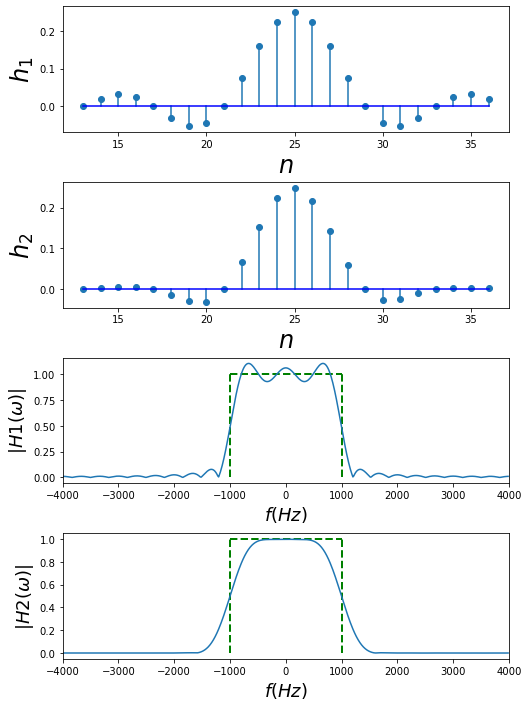

In [13]:
fig1,axs1 = subplots(4,1)
fig1.set_size_inches((8,12))
subplots_adjust(hspace=0.4)

ax=axs1[0]
ax.stem(n+M,h1,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_1$",fontsize=24)


ax=axs1[1]
ax.stem(n+M,h2,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_2$",fontsize=24)

ax=axs1[2]
ax.plot((w1-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh1)))
ax.axis(xmax=fs/2,xmin=-fs/2)
ax.vlines([-fc,fc],0,1,color='g',lw=2.,linestyle='--')
ax.hlines(1,-fc,fc,color='g',lw=2.,linestyle='--')
ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$|H1(\omega)| $",fontsize=18)

ax=axs1[3]
ax.plot((w2-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh2)))
ax.axis(xmax=fs/2,xmin=-fs/2)
ax.vlines([-fc,fc],0,1,color='g',lw=2.,linestyle='--')
ax.hlines(1,-fc,fc,color='g',lw=2.,linestyle='--')
ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$|H2(\omega)| $",fontsize=18)



